In [1]:
from scipy import stats as sts
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def f(x):
    
    Z = 24.44321494051954
    
    if abs(x) > 7:
        return 0
    
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    
    elif abs(x) > 1:
        return ((3 - abs(x)) / 2 - 3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)) / Z
    
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    
    else:
        return 2.25 / Z

In [6]:
def step(x):
    
    y = sts.norm.rvs(loc = x, scale = 2, size = 1) # Choose next point
    
    if np.random.rand() < min(1, f(y)/f(x)): # Accept or not
        x = y

    return float(x)

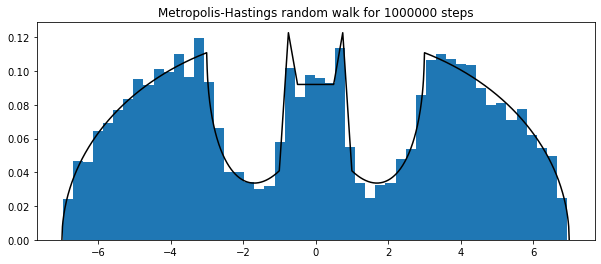

In [20]:
def simulate(x, steps):
    
    randomwalk = []
    
    for i in range(steps):
        x = step(x) # Do a walk for given number of steps
        if i%100 == 0: # Record each 100th step
            randomwalk.append(x)
            
            
    y = np.linspace(-7, 7, 1000)
    truedistribution = []
    
    for j in y: # For drawing the true distribution
        truedistribution.append(f(j))
    
    plt.figure(figsize = (10, 4))
    plt.hist(randomwalk, bins = 50, density = True)
    plt.plot(y, truedistribution, color = 'black')
    plt.title(f'Metropolis-Hastings random walk for {steps} steps')
    plt.show()
    
    
simulate(0, 1000000) # x0 = 0